In [2]:
# roll_number = int(input("enter roll number (U23CH---)"))
roll_number = 107
from equations import vap_pressure,wilson,boiling_pt,nrtl
from roll_lookup import get_components_by_roll
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("table_with_antoine.csv")
components = get_components_by_roll(roll_number)
print(components)
index,System,v1,v2,a12,a21,b12,b21,alpha, A1,B1,C1,A2,B2,C2=data[data["System"] == components].reset_index().loc[0]

Acetone(1) - Methanol(2)


12.12

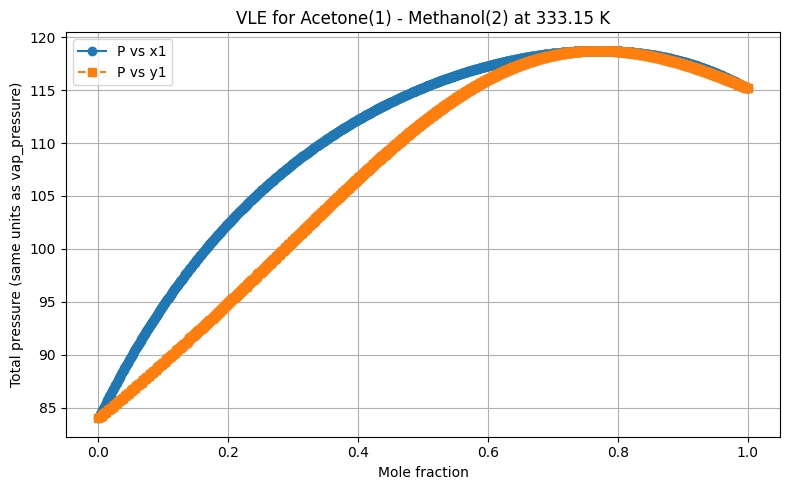

           x1        y1    pressure
0    0.000000  0.000000   83.989096
1    0.001001  0.002494   84.114854
2    0.002002  0.004974   84.240183
3    0.003003  0.007441   84.365085
4    0.004004  0.009894   84.489561
..        ...       ...         ...
995  0.995996  0.994809  115.294197
996  0.996997  0.996101  115.259892
997  0.997998  0.997397  115.225372
998  0.998999  0.998696  115.190639
999  1.000000  1.000000  115.155691

[1000 rows x 3 columns]


In [3]:
temp = 333.15

p1sat = vap_pressure(A1,B1,C1,temp)
p2sat = vap_pressure(A2,B2,C2,temp)

x1= np.linspace(0, 1, num=1000)
gamma1 = [wilson(x1,v1,v2,a12,a21,temp)[0] for x1 in x1 ] 
gamma2 = [wilson(x1,v1,v2,a12,a21,temp)[1] for x1 in x1 ] 


pb = [ x1[i]*gamma1[i]*p1sat + (1-x1[i])*p2sat*gamma2[i] for i in range(len(x1)) ]
y1 = [(x1[i]*p1sat*gamma1[i])/pb[i] for i in range(len(x1))]
result = pd.DataFrame({"x1":x1, "y1":y1 , "pressure":pb})


plt.figure(figsize=(8,5))
plt.plot(x1, pb, marker='o', linestyle='-', label='P vs x1')
plt.plot(y1, pb, marker='s', linestyle='--', label='P vs y1')
plt.xlabel('Mole fraction')
plt.ylabel('Total pressure (same units as vap_pressure)')
plt.title(f'VLE for {components} at {temp:.2f} K')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
print(result)

12.13

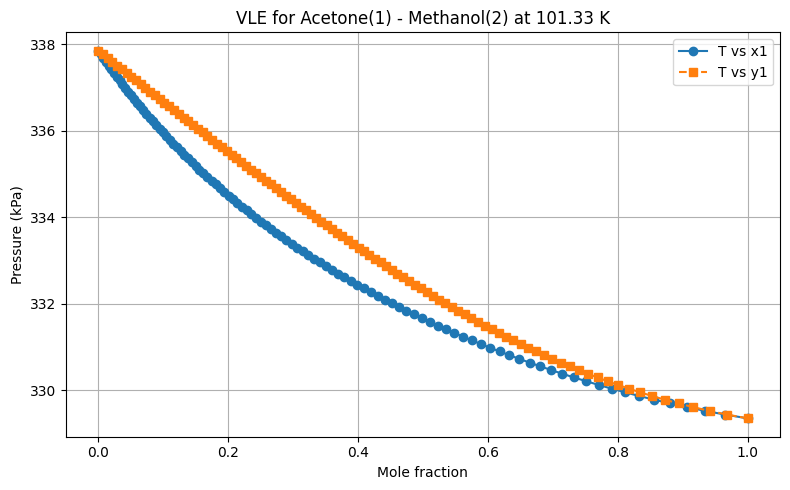

              x1            y1  temperature
0   1.000000e+00  1.000000e+00   329.350170
1   9.658430e-01  9.689013e-01   329.436028
2   9.352050e-01  9.414985e-01   329.521887
3   9.071529e-01  9.167770e-01   329.607746
4   8.811109e-01  8.941118e-01   329.693605
..           ...           ...          ...
95  1.606599e-02  2.916355e-02   337.506754
96  1.197343e-02  2.187328e-02   337.592613
97  7.932205e-03  1.458290e-02   337.678472
98  3.941367e-03  7.291958e-03   337.764330
99  1.627300e-16  3.029733e-16   337.850189

[100 rows x 3 columns]


In [4]:
p = 101.33
t1sat = boiling_pt(A1,B1,C1,p) 
t2sat = boiling_pt(A2,B2,C2,p) 

temp = np.linspace(t1sat,t2sat,100)


p1sat = [ vap_pressure(A1,B1,C1,temp[i]) for i in range(len(temp))]
p2sat = [ vap_pressure(A2,B2,C2,temp[i]) for i in range(len(temp))]

for i in range(10):
    if i==0:
        gamma2 = gamma1 = 1
        x1 = [(p - gamma2 * p2sat[i]) / (gamma1 * p1sat[i] - gamma2 * p2sat[i]) for i in range(len(temp)) ]
        
    else:
        gamma1 = [wilson(x1[i],v1,v2,a12,a21,temp[i]+273.15)[0] for i in range(len(temp))] 
        gamma2 = [wilson(x1[i],v1,v2,a12,a21,temp[i]+273.15)[1] for i in range(len(temp)) ] 
        x1 = [(p - gamma2[i] * p2sat[i]) / (gamma1[i] * p1sat[i] - gamma2[i] * p2sat[i]) for i in range(len(temp)) ]
       

y1 = [x1[i]*p1sat[i]*gamma1[i]/p for i in range(len(temp))]
result = pd.DataFrame({"x1":x1, "y1":y1 , "temperature":temp})
plt.figure(figsize=(8,5))
plt.plot(x1, temp, marker='o', linestyle='-', label='T vs x1')
plt.plot(y1, temp, marker='s', linestyle='--', label='T vs y1')
plt.xlabel('Mole fraction')
plt.ylabel('Pressure (kPa)')
plt.title(f'VLE for {components} at {p:.2f} K')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
print(result)


12.14

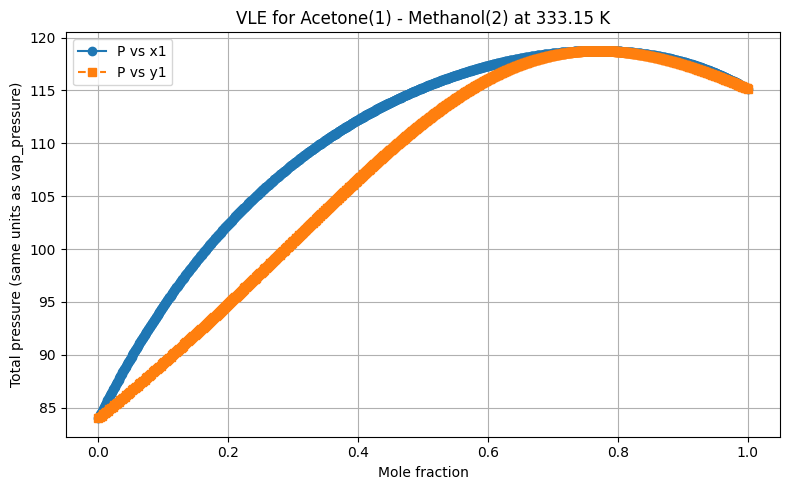

           x1        y1    pressure
0    0.000000  0.000000   83.989096
1    0.001001  0.002476   84.113325
2    0.002002  0.004938   84.237150
3    0.003003  0.007388   84.360573
4    0.004004  0.009824   84.483594
..        ...       ...         ...
995  0.995996  0.994801  115.295052
996  0.996997  0.996095  115.260532
997  0.997998  0.997393  115.225798
998  0.998999  0.998695  115.190852
999  1.000000  1.000000  115.155691

[1000 rows x 3 columns]


In [5]:
temp = 333.15

p1sat = vap_pressure(A1,B1,C1,temp)
p2sat = vap_pressure(A2,B2,C2,temp)

x1= np.linspace(0, 1, num=1000)
gamma1 = [nrtl(x1,b12,b21,alpha,temp)[0] for x1 in x1 ] 
gamma2 = [nrtl(x1,b12,b21,alpha,temp)[1] for x1 in x1 ] 


pb = [ x1[i]*gamma1[i]*p1sat + (1-x1[i])*p2sat*gamma2[i] for i in range(len(x1)) ]
y1 = [(x1[i]*p1sat*gamma1[i])/pb[i] for i in range(len(x1))]
result = pd.DataFrame({"x1":x1, "y1":y1 , "pressure":pb})


plt.figure(figsize=(8,5))
plt.plot(x1, pb, marker='o', linestyle='-', label='P vs x1')
plt.plot(y1, pb, marker='s', linestyle='--', label='P vs y1')
plt.xlabel('Mole fraction')
plt.ylabel('Total pressure (same units as vap_pressure)')
plt.title(f'VLE for {components} at {temp:.2f} K')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
print(result)

12.15

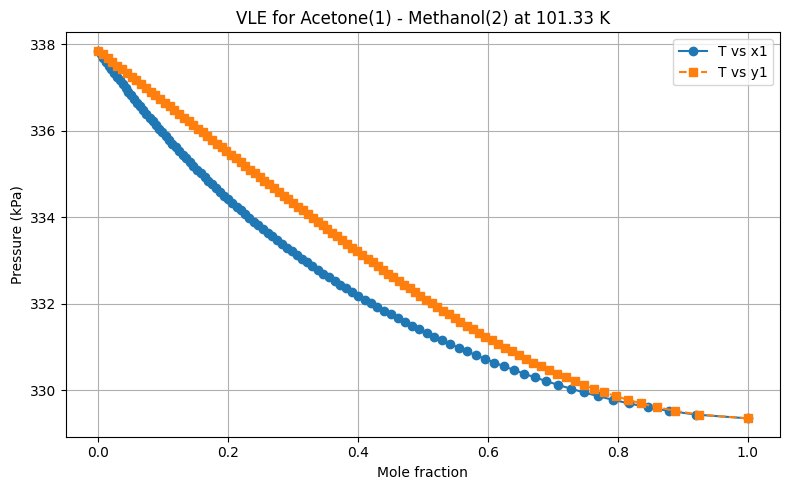

              x1            y1  temperature
0   1.000000e+00  1.000000e+00   329.350170
1   9.210767e-01  9.256665e-01   329.436028
2   8.792876e-01  8.886882e-01   329.521887
3   8.462587e-01  8.603673e-01   329.607746
4   8.178746e-01  8.365582e-01   329.693605
..           ...           ...          ...
95  1.637192e-02  2.949254e-02   337.506754
96  1.221896e-02  2.213157e-02   337.592613
97  8.106445e-03  1.476272e-02   337.678472
98  4.033682e-03  7.385645e-03   337.764330
99  1.667777e-16  3.070210e-16   337.850189

[100 rows x 3 columns]


In [6]:
p = 101.33
t1sat = boiling_pt(A1,B1,C1,p) 
t2sat = boiling_pt(A2,B2,C2,p) 

temp = np.linspace(t1sat,t2sat,100)


p1sat = [ vap_pressure(A1,B1,C1,temp[i]) for i in range(len(temp))]
p2sat = [ vap_pressure(A2,B2,C2,temp[i]) for i in range(len(temp))]

for i in range(10):
    if i==0:
        gamma2 = gamma1 = 1
        x1 = [(p - gamma2 * p2sat[i]) / (gamma1 * p1sat[i] - gamma2 * p2sat[i]) for i in range(len(temp)) ]
        
    else:
        gamma1 = [nrtl(x1[i],b12,b21,alpha,temp[i]+273.15)[0] for i in range(len(temp))] 
        gamma2 = [nrtl(x1[i],b12,b21,alpha,temp[i]+273.15)[1] for i in range(len(temp)) ] 
        x1 = [(p - gamma2[i] * p2sat[i]) / (gamma1[i] * p1sat[i] - gamma2[i] * p2sat[i]) for i in range(len(temp)) ]
       

y1 = [x1[i]*p1sat[i]*gamma1[i]/p for i in range(len(temp))]
result = pd.DataFrame({"x1":x1, "y1":y1 , "temperature":temp})
plt.figure(figsize=(8,5))
plt.plot(x1, temp, marker='o', linestyle='-', label='T vs x1')
plt.plot(y1, temp, marker='s', linestyle='--', label='T vs y1')
plt.xlabel('Mole fraction')
plt.ylabel('Pressure (kPa)')
plt.title(f'VLE for {components} at {p:.2f} K')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
print(result)


12.16

In [15]:
temp = 333.15
# (a)
x1=0.3
p1sat = vap_pressure(A1,B1,C1,temp)
p2sat = vap_pressure(A2,B2,C2,temp)
gamma1 ,gamma2 = wilson(x1,v1,v2,a12,a21,temp)
pb = x1*p1sat*gamma1 + (1-x1)*p2sat*gamma2
print(f"bubble pressure for (a) is {pb} kelvin")

# (b)
y1 = 0.3
for i in range(10):
    if i==0:
        gamma2 = gamma1 = 1
        pd = 1/(y1/(gamma1*p1sat) + (1-y1)/(gamma2*p2sat))
        x1 = (y1*pd)/(p1sat*gamma1)
        # print(x1)
    else:
        gamma1 ,gamma2 = wilson(x1,v1,v2,a12,a21,temp)
        pd = 1/(y1/(gamma1*p1sat) + (1-y1)/(gamma2*p2sat))
        x1 = (y1*pd)/(p1sat*gamma1)
        # print(f"aftrer {i}th iteration ->gamma1,gaam2,pd,x1 is  {gamma1,gamma2,pd,x1}")
        # print(x1)
print(f"dew pressure for (b) is {pd} kelvin")
# (c)
t_flash = temp
p_flash=(pb+pd)/2
p1sat = vap_pressure(A1,B1,C1,t_flash)
p2sat = vap_pressure(A2,B2,C2,t_flash)
z1 = 0.3



for i in range(10):
    gamma1,gamma2 =  wilson(x1,v1,v2,a12,a21,t_flash) if i==0 else (1,1)
    k1,k2 = gamma1*p1sat/p_flash , gamma2*p2sat/p_flash
    for v in np.linspace(0,1,10):
        summation = z1*k1/(1+v*(k1-1)) + (1-z1)*k2/(1+v*(k2-1))
        print(f"v,summation -> {v,summation}")
        if abs(summation-1) < 0.01:
            print("breaking value of flash v ->",v)
            # break
    y1 = x1*k1/(1+v*(k1-1))
    x1 = y1/k1

        
# (d)
# p1sat = vap_pressure(A1,B1,C1,temp)
# p2sat = vap_pressure(A2,B2,C2,temp)
# for x1 in np.linspace(0,1,101):
#     gamma1,gamma2 = wilson(x1,v1,v2,a12,a21,temp)
#     print(gamma1*p1sat - gamma2*p2sat, x1)
#     if (gamma1*p1sat - gamma2*p2sat) <0.1:
#         print(x1,"--")
#         # break

bubble pressure for (a) is 108.0548723332497 kelvin
dew pressure for (b) is 100.772584722869 kelvin
v,summation -> (0.0, 1.0672162612169622)
v,summation -> (0.1111111111111111, 1.0459925932979899)
v,summation -> (0.2222222222222222, 1.0293809091573904)
v,summation -> (0.3333333333333333, 1.0166835051516268)
v,summation -> (0.4444444444444444, 1.0073675882437287)
breaking value of flash v -> 0.4444444444444444
v,summation -> (0.5555555555555556, 1.0010228341094973)
breaking value of flash v -> 0.5555555555555556
v,summation -> (0.6666666666666666, 0.9973318257757515)
breaking value of flash v -> 0.6666666666666666
v,summation -> (0.7777777777777777, 0.99604909435927)
breaking value of flash v -> 0.7777777777777777
v,summation -> (0.8888888888888888, 0.9969860448066025)
breaking value of flash v -> 0.8888888888888888
v,summation -> (1.0, 1.0)
breaking value of flash v -> 1.0
v,summation -> (0.0, 0.8939348835443321)
v,summation -> (0.1111111111111111, 0.9027056337683808)
v,summation -> (0

12.17

In [8]:
temp = 333.15
# (a)
x1=0.3
p1sat = vap_pressure(A1,B1,C1,temp)
p2sat = vap_pressure(A2,B2,C2,temp)
gamma1 ,gamma2 = nrtl(x1,b12,b21,alpha,temp)
pb = x1*p1sat*gamma1 + (1-x1)*p2sat*gamma2

# (b)
y1 = 0.3
for i in range(100):
    if i==0:
        gamma2 = gamma1 = 1
        pd = 1/(y1/(gamma1*p1sat) + (1-y1)/(gamma2*p2sat))
        x1 = (y1*pd)/(p1sat*gamma1)
    else:
        gamma1 ,gamma2 = nrtl(x1,b12,b21,alpha,temp)
        pd = 1/(y1/(gamma1*p1sat) + (1-y1)/(gamma2*p2sat))
        x1 = (y1*pd)/(p1sat*gamma1)

# (c)
t_flash = temp
p_flash=(pb+pd)/2
p1sat = vap_pressure(A1,B1,C1,t_flash)
p2sat = vap_pressure(A2,B2,C2,t_flash)
gamma1,gamma2 = nrtl(x1,b12,b21,alpha,t_flash)
z1 = 0.3
k1,k2 = p1sat/p_flash , p2sat/p_flash

for v in np.linspace(0,1,10000):
    summation = gamma1*x1*k1/(1+v*(k1-1)) + gamma2*(1-x1)*k2/(1+v*(k2-1))
    # print(v,summation)
    if abs(summation-1) < 0.0001:
        print("breaking",v)
        break


breaking 0.3136313631363136


12.18

In [9]:
p=101.33
# (a)
x1 = 0.3
t1sat = boiling_pt(A1,B1,C1,p)
t2sat = boiling_pt(A2,B2,C2,p)
t_avg = 0.5*(t1sat+t2sat)
temp =t_avg
temp_old = 0


while abs(temp-temp_old)>0.001:
    p1sat = vap_pressure(A1,B1,C1,temp)
    p2sat = vap_pressure(A2,B2,C2,temp)

    gamma1,gamma2 =  wilson(x1,v1,v2,a12,a21,temp)

    relative_volatility = p1sat/p2sat
    p1sat = p*(x1*gamma1 + (1-x1)*gamma2/relative_volatility)

    temp_old = temp
    temp = boiling_pt(A1,B1,C1,p1sat)
tb = temp 
print(f"bubble temperature for (a) is {temp} kelvin")

# (b)
y1 = 0.3
t1sat = boiling_pt(A1,B1,C1,p)
t2sat = boiling_pt(A2,B2,C2,p)
t_avg = 0.5*(t1sat+t2sat)
temp =t_avg
temp_old = 0
gamma1,gamma2 = 1,1
while abs(temp-temp_old)>0.001:
    p1sat = vap_pressure(A1,B1,C1,temp)
    p2sat = vap_pressure(A2,B2,C2,temp)
    
    pd = 1/(y1/(gamma1*p1sat) + (1-y1)/(gamma2*p2sat))

    x1 = y1*pd/(p1sat*gamma1)
    x2 = 1-x1

    gamma1,gamma2 =  wilson(x1,v1,v2,a12,a21,temp)

    relative_volatility = p1sat/p2sat
    p1sat = p*(y1/gamma1+((1-y1)*relative_volatility)/gamma2)

    temp_old = temp
    temp = boiling_pt(A1,B1,C1,p1sat) 
td = temp
print(f"dew temperature for (b) is {temp} kelvin")

# (c)
t_flash = 0.5*(tb+td)
p_flash=p
p1sat = vap_pressure(A1,B1,C1,t_flash)
p2sat = vap_pressure(A2,B2,C2,t_flash)
gamma1,gamma2 =  wilson(x1,v1,v2,a12,a21,t_flash)
z1 = 0.3
k1,k2 = p1sat/p_flash , p2sat/p_flash

for v in np.linspace(0,1,10000):
    summation = gamma1*x1*k1/(1+v*(k1-1)) + gamma2*(1-x1)*k2/(1+v*(k2-1))
    # print(v,summation)
    if abs(summation-1) < 0.0001:
        print("breaking",v)
        break
# (d)
# p1sat = vap_pressure(A1,B1,C1,t_flash)
# p2sat = vap_pressure(A2,B2,C2,t_flash)
# for x1 in np.linspace(0,1,100):
#     gamma1,gamma2 = wilson(x1,v1,v2,a12,a21,t_flash)
#     if (gamma1/gamma2 - p2sat/p1sat) <0.001:
#         print(x1,"--")
#         break


bubble temperature for (a) is 326.7946086501085 kelvin
dew temperature for (b) is 333.29118139225477 kelvin
breaking 0.6101610161016102
